In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import date
%matplotlib inline

#### Во вкладке "Материалы" расположен временной ряд за несколько лет.
#### 2.Используйте любой инструмент для дата майнинга (можно даже ту же самую электронную таблицу).

#### Найдите закономерности в представленном временном ряду, если они есть.

#### Сделайте прогноз по тренду.

#### Напишите краткий отчёт об исследовании и пришлите преподавателю ссылку на него.

In [2]:
rdata = pd.read_excel('data.xlsx', sheetname='row')
rdata.columns

Index(['Date', 'Value'], dtype='object')

In [3]:
rdata.shape

(1461, 2)

In [4]:
rdata.describe().apply(round)

,Value
count,1461.0
mean,3.0
std,3.0
min,0.0
25%,1.0
50%,1.0
75%,4.0
max,10.0


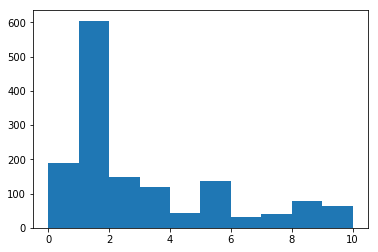

In [30]:
plt.hist(rdata['Value'], bins = 10)
plt.show()

In [43]:
rdata['Date'] = pd.to_datetime(rdata['Date'])

По общей статистике можно сделать вывод, что речь идет о ежедневных транзакциях. 

Больше 50% выборки имеют значение 1. По графику видно, что мода тоже равна 1.

При этом средняя равна 3 единицам. Что говорит о неравномерности потока.

Ряд ранных не подчинен закону нормального распределения. Есть о чем подумать.

In [11]:
rdata.index = rdata['Date']

In [26]:
by_year = rdata.groupby(rdata.index.year).agg({'Value': 'sum'})
by_year

,Value
Date,
2014,799
2015,1041
2016,907
2017,817
2018,263


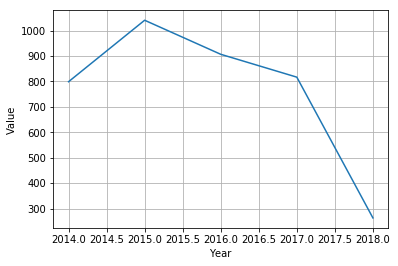

In [32]:
plt.plot(by_year['Value'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [42]:
ly = rdata.loc[(rdata.index.year == 2018),:]
ly.groupby(ly.index.month).agg({'Value': 'sum'})

,Value
Date,
1,67
2,71
3,63
4,62


In [47]:
fy = rdata.loc[(rdata.index.year == 2014),:]
fy.groupby(fy.index.month).agg({'Value': 'sum'})

,Value
Date,
5,84
6,116
7,57
8,118
9,134
10,82
11,104
12,104


За 2014 есть данные за последние 8 месяцев, за 2018 - за первые 4.

Если с 2014 по 2018 год не было каких либо исключительных событий, влияющих на данные и если мы говорим о полноте данных,
то можно сделать вывод о том что по годам показазатель снижается примерно на 10% -15% в год. Причем, падение замедляется. Как если речь о маркетинговом сглаживании, выравнивании ситуации

In [28]:
by_month = rdata.groupby(rdata.index.month).agg({'Value': 'sum'})
by_month

,Value
Date,
1,272
2,308
3,296
4,343
5,304
6,343
7,315
8,354
9,371


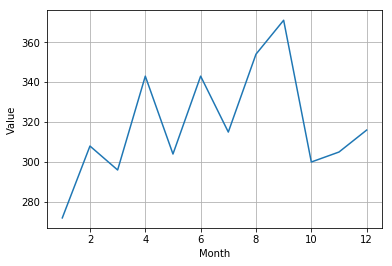

In [30]:
plt.plot(by_month['Value'])
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Суммарный показатель в разрезе месяцов дает примерное понимание сезонности. 
На графике виден зубчатый тренд.
Если мы говорим о потреблении, то в целом картина: крупные заказы делаются через месяц. Исключение - 9 месяц. Надо смотеть глубже, что там происходило.

In [39]:
by_day = rdata.groupby(rdata.index.day).agg({'Value': 'sum'})

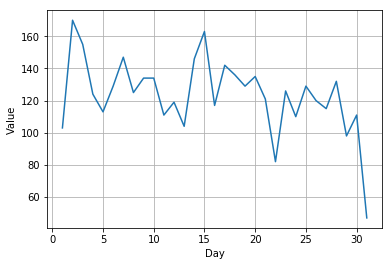

In [34]:
plt.plot(by_day['Value'])
plt.xlabel('Day')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [49]:
by_day.describe().apply(round)

,Value
count,31.0
mean,123.0
std,24.0
min,47.0
25%,112.0
50%,125.0
75%,134.0
max,170.0


Интересная картина сезонности по дням. 

Явно вырисовываются всплески по 1 и 15 числу на 33 - 38%.

И спад 22 (на 35%) и 31 числа . 

Не смотря на то, что 31 чисел в году вполовину меньше. За 31 показатели ниже среднего почти в 3 раза.

Прогноз по тренду:
    Если не будет кардинальных изменений на рынке, то  2018 год закончится  на уровне 750 -780 единиц ( -5 -7% к прошлому году).
    На 2019 вполне вероятно ожидать аналогичный тренд и показатель за год 710 - 730 единиц.